## Pandas Introduction

In [2]:
import pandas as pd
import numpy as np

### DataSeries

In [3]:
mySeries3 = pd.Series({'a':1,'b':2,'c':3})
mySeries3

a    1
b    2
c    3
dtype: int64

In [4]:
d = {'a': 1, 'b': 2, 'c': 3}
mySeries = pd.Series(data=d, index=(['a','b','c']))
mySeries

a    1
b    2
c    3
dtype: int64

In [5]:
Series_Dict = pd.Series({"Jakarta":1,"London":2, "Tokyo":3})
Series_Dict

Jakarta    1
London     2
Tokyo      3
dtype: int64

In [6]:
range = pd.date_range("7/09/2021", periods = 60, freq = 'D')
valueluw = np.random.random([60])
MyDataSeries = pd.Series(valueluw, index = range)

<AxesSubplot:>

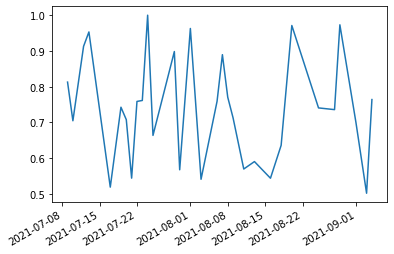

In [7]:
filterReadData = MyDataSeries[MyDataSeries >= 0.5]
filterReadData.plot()

### DataFrame

In [17]:
studentDataFrame = pd.DataFrame({
    "name":['safira', 'damon', 'kurt'],
    "age" :[21,22,23],
    "IPK" :[3.81,3.5,3.6],
    "SKS" :[134,134,134],
})
studentDataFrame

,name,age,IPK,SKS
0,safira,21,3.81,134
1,damon,22,3.50,134
2,kurt,23,3.60,134


In [9]:
studentDataFrame.filter(items=["name","IPK"], axis = "columns")


,name,IPK
0,safira,3.81
1,damon,3.50
2,kurt,3.60


In [18]:
studentDataFrame['kredit'] = studentDataFrame['SKS'] * studentDataFrame['IPK']
studentDataFrame

,name,age,IPK,SKS,kredit
0,safira,21,3.81,134,510.54
1,damon,22,3.50,134,469.00
2,kurt,23,3.60,134,482.40


In [19]:
studentDataFrame=studentDataFrame.append({
    "name":"liam",
    "age":22,
    "IPK":3.54,
    "SKS":134
}, ignore_index = True)
studentDataFrame

,name,age,IPK,SKS,kredit
0,safira,21,3.81,134,510.54
1,damon,22,3.50,134,469.00
2,kurt,23,3.60,134,482.40
3,liam,22,3.54,134,NaN


In [20]:
studentDataFrame[studentDataFrame.name.str.contains("^l")]

,name,age,IPK,SKS,kredit
3,liam,22,3.54,134,NaN


In [12]:
movieDB = pd.read_csv('http://bit.ly/imdbratings')
movieDB.head(10)
                      

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [13]:
movieDB.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [14]:
movieDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [22]:
veryGoodMovies= movieDB[(movieDB['star_rating']>7) & (movieDB['duration']<=100)]
veryGoodMovies.sort_values(by=['star_rating'],ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
48,8.5,Dr. Strangelove or: How I Learned to Stop Worr...,PG,Comedy,95,"[u'Peter Sellers', u'George C. Scott', u'Sterl..."
55,8.5,The Lion King,G,Animation,89,"[u'Matthew Broderick', u'Jeremy Irons', u'Jame..."
...,...,...,...,...,...,...
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
942,7.4,Raising Arizona,PG-13,Comedy,94,"[u'Nicolas Cage', u'Holly Hunter', u'Trey Wils..."
939,7.4,Predestination,R,Drama,97,"[u'Ethan Hawke', u'Sarah Snook', u'Noah Taylor']"
933,7.4,Beetlejuice,PG,Comedy,92,"[u'Alec Baldwin', u'Geena Davis', u'Michael Ke..."


In [28]:
movieDB.iloc[250:300]

,star_rating,title,content_rating,genre,duration,actors_list
250,8.1,In the Mood for Love,PG,Drama,98,"[u'Tony Chiu Wai Leung', u'Maggie Cheung', u'P..."
251,8.1,The Man Who Shot Liberty Valance,APPROVED,Drama,123,"[u'James Stewart', u'John Wayne', u'Vera Miles']"
252,8.1,Arsenic and Old Lace,NOT RATED,Comedy,118,"[u'Cary Grant', u'Priscilla Lane', u'Raymond M..."
253,8.1,The Big Sleep,APPROVED,Crime,114,"[u'Humphrey Bogart', u'Lauren Bacall', u'John ..."
254,8.1,Roman Holiday,NOT RATED,Comedy,118,"[u'Gregory Peck', u'Audrey Hepburn', u'Eddie A..."
255,8.1,The Philadelphia Story,NOT RATED,Comedy,112,"[u'Cary Grant', u'Katharine Hepburn', u'James ..."
256,8.1,Akira,R,Animation,124,"[u'Nozomu Sasaki', u'Mami Koyama', u'Mitsuo Iw..."
257,8.1,Anatomy of a Murder,UNRATED,Crime,160,"[u'James Stewart', u'Lee Remick', u'Ben Gazzara']"
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
259,8.1,The Help,PG-13,Drama,146,"[u'Emma Stone', u'Viola Davis', u'Octavia Spen..."


In [30]:
import re
movieDB[movieDB.title.str.contains("^sp", flags = re.IGNORECASE)]groupby(['genre'])


SyntaxError: invalid syntax (<ipython-input-30-fcbf8254c71c>, line 2)

In [31]:
groupedMovie = movieDB.groupby(['genre'])["title"]
groupedMovie.describe()

,count,unique,top,freq
genre,,,,
Action,136,136,The Last Samurai,1
Adventure,75,74,True Grit,2
Animation,62,62,Pink Floyd The Wall,1
Biography,77,77,Papillon,1
Comedy,156,156,The Station Agent,1
Crime,124,123,The Girl with the Dragon Tattoo,2
Drama,278,278,Days of Heaven,1
Family,2,2,E.T. the Extra-Terrestrial,1
Fantasy,1,1,The City of Lost Children,1


In [33]:
summary = movieDB.pivot_table(index=['genre'],
                             values = ['duration','star_rating'],
                             aggfunc={'duration':'mean',
                                     'star_rating':'mean'})
summary

,duration,star_rating
genre,,
Action,126.485294,7.884559
Adventure,134.840000,7.933333
Animation,96.596774,7.914516
Biography,131.844156,7.862338
Comedy,107.602564,7.822436
Crime,122.298387,7.916935
Drama,126.539568,7.902518
Family,107.500000,7.850000
Fantasy,112.000000,7.700000


array([<AxesSubplot:title={'center':'duration'}, xlabel='genre'>,
       <AxesSubplot:title={'center':'star_rating'}, xlabel='genre'>],
      dtype=object)

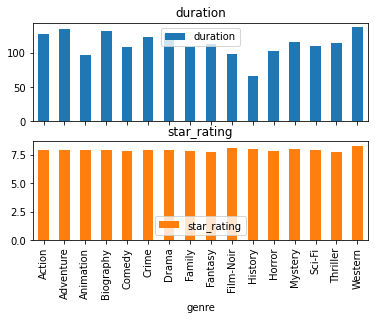

In [34]:
summary.plot.bar(subplots=True)

In [35]:
summary.to_csv('./moviesum.csv')

In [37]:
moviesum = pd.read_csv('./moviesum.csv')
moviesum

,genre,duration,star_rating
0,Action,126.485294,7.884559
1,Adventure,134.840000,7.933333
2,Animation,96.596774,7.914516
3,Biography,131.844156,7.862338
4,Comedy,107.602564,7.822436
5,Crime,122.298387,7.916935
6,Drama,126.539568,7.902518
7,Family,107.500000,7.850000
8,Fantasy,112.000000,7.700000
9,Film-Noir,97.333333,8.033333


In [38]:
movieSumClean = moviesum.dropna()
movieSumClean

,genre,duration,star_rating
0,Action,126.485294,7.884559
1,Adventure,134.840000,7.933333
2,Animation,96.596774,7.914516
3,Biography,131.844156,7.862338
4,Comedy,107.602564,7.822436
5,Crime,122.298387,7.916935
6,Drama,126.539568,7.902518
7,Family,107.500000,7.850000
8,Fantasy,112.000000,7.700000
9,Film-Noir,97.333333,8.033333


In [39]:
movieSumSeries = pd.Series(movieSumClean['duration'],index = movieSumClean['genre'])
movieSumSeries

genre
Action      NaN
Adventure   NaN
Animation   NaN
Biography   NaN
Comedy      NaN
Crime       NaN
Drama       NaN
Family      NaN
Fantasy     NaN
Film-Noir   NaN
History     NaN
Horror      NaN
Mystery     NaN
Sci-Fi      NaN
Thriller    NaN
Western     NaN
Name: duration, dtype: float64

In [40]:
movieSumClean['duration']

0     126.485294
1     134.840000
2      96.596774
3     131.844156
4     107.602564
5     122.298387
6     126.539568
7     107.500000
8     112.000000
9      97.333333
10     66.000000
11    102.517241
12    115.625000
13    109.000000
14    114.200000
15    136.666667
Name: duration, dtype: float64